<a href="https://colab.research.google.com/github/tak-creator/giganci/blob/main/logika_rozmyta.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install scikit-fuzzy

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 920.8/920.8 kB 11.6 MB/s eta 0:00:00


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import skfuzzy as fuzz

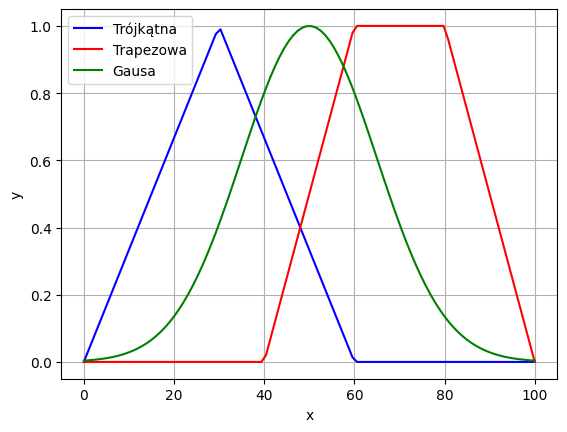

In [ ]:
x = np.linspace(0, 100, 100)# równomiernie rozkłada na osi x na początku losuje

trimf = fuzz.trimf(x, [0, 30, 60])
traomf = fuzz.trapmf(x, [40, 60, 80, 100])
gaussmf = fuzz.gaussmf(x, mean=50, sigma=15)

plt.plot(x, trimf, 'b', linewidth=1.5, label='Trójkątna')
plt.plot(x, traomf, 'r', linewidth=1.5, label='Trapezowa')
plt.plot(x, gaussmf, 'g', linewidth=1.5, label='Gausa')
plt.grid(True)
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()

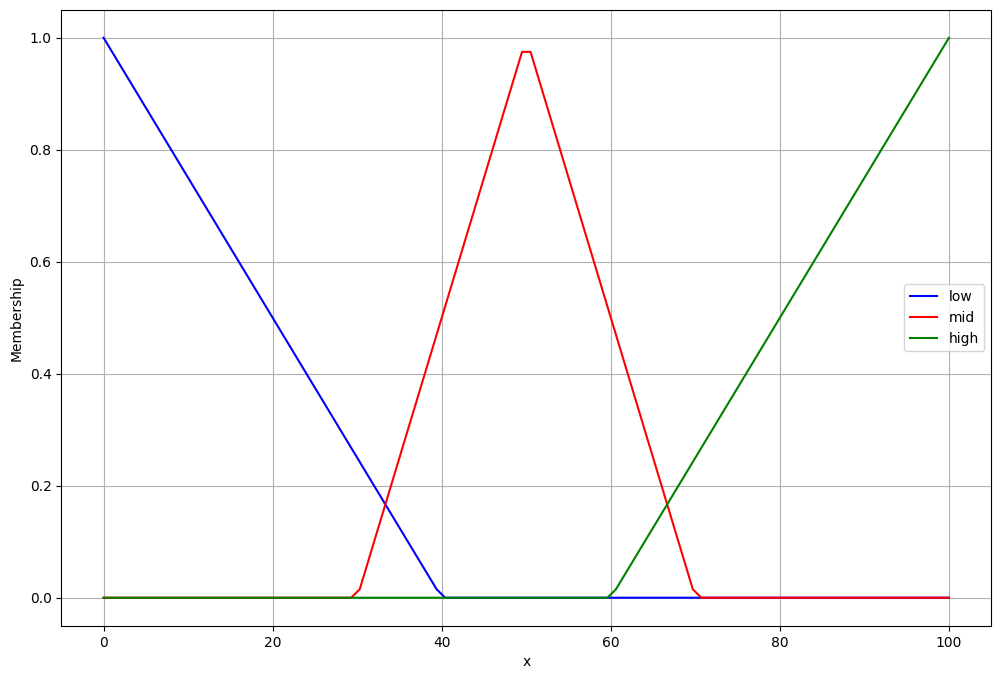

In [ ]:
x = np.linspace(0, 100, 100)# równomiernie rozkłada na osi x na początku losuje

trimfHP_low = fuzz.trimf(x, [0, 0, 40])
trimfHP_mid = fuzz.trimf(x, [30, 50, 70])
trimfHP_high = fuzz.trimf(x, [60, 100, 100])

plt.figure(figsize=(12, 8))

plt.plot(x, trimfHP_low, 'b', linewidth=1.5, label='low')
plt.plot(x, trimfHP_mid, 'r', linewidth=1.5, label='mid')
plt.plot(x, trimfHP_high, 'g', linewidth=1.5, label='high')

plt.xlabel('x')
plt.ylabel('Membership')
plt.legend()
plt.grid(True)
plt.show()